In [1]:
#Import required libraries
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score


## Read Data

In [2]:
#Loading Dataset
hspt_data = pd.read_csv("/home/datasets/exam/Train-1617360447408.csv", na_values='unknown')
test_data =  pd.read_csv("/home/datasets/exam/test-1617360461595.csv", na_values='unknown')

In [3]:
#Get the shape of train & test data
print(hspt_data.shape)
print(test_data.shape)
#Display records of train data
hspt_data.head()

(66587, 49)
(16647, 48)


,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [4]:
#Checking data types of each variable
hspt_data.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

## Handle Missing Values

In [5]:
#Handling Missing Values

#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign

for col in hspt_data.columns:
    if hspt_data[col].dtype == object:
         print(col,hspt_data[col][hspt_data[col] == '?'].count())

race 1504
gender 0
age 0
weight 64454
medical_specialty 32672
diag_1 15
diag_2 231
diag_3 954
diag_4 954
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


In [6]:
#Describing the train data
hspt_data.describe()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted
count,66587.000000,6.658700e+04,6.658700e+04,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000
mean,50903.474282,1.653153e+08,5.422970e+07,4.397510,43.115533,1.331521,16.028744,0.365672,0.200460,0.637602,49.703387,7.424948,0.462012
std,29480.255515,1.030035e+08,3.878819e+07,2.980995,19.630417,1.705746,8.125304,1.221861,0.905503,1.255487,28.864879,1.933061,0.498559
min,0.000000,1.573800e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000283,1.000000,0.000000
25%,25166.500000,8.440328e+07,2.338646e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,24.622056,6.000000,0.000000
50%,51129.000000,1.528504e+08,4.526103e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,49.508499,8.000000,0.000000
75%,76380.000000,2.305049e+08,8.727185e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,74.637294,9.000000,1.000000
max,101765.000000,4.438672e+08,1.893494e+08,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,99.995810,16.000000,1.000000


In [7]:
#Describing train data for object type 
hspt_data.describe(include=['object'])

,race,gender,age,weight,medical_specialty,diag_1,diag_2,diag_3,diag_4,X1,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
count,66587,66587,66587,66587,66587,66587,66587,66587,66587,66587,...,66587,66587,66587,66587,66587,66587,66587,66587,66587,66587
unique,6,3,10,10,65,652,656,707,707,4,...,1,1,4,4,2,2,2,1,2,2
top,Caucasian,Female,[70-80),?,?,428,276,250,250,None,...,No,No,No,No,No,No,No,No,No,Yes
freq,49906,35973,17031,64454,32672,4564,4420,7499,7499,63104,...,66587,66587,31175,66110,66575,66586,66582,66587,35894,51205


In [8]:
#Getting the count of data which are of Unknown/invalid
print('gender', hspt_data['gender'][hspt_data['gender'] == 'Unknown/Invalid'].count()) 

gender 2


In [9]:
#checking the count of unique values for index column
hspt_data.index.nunique()

66587

In [10]:
#dropping columns with large number of missing values & index column
hspt_data = hspt_data.drop(['weight','index','medical_specialty'], axis = 1)

In [11]:
#Checking data types of each variable
hspt_data.dtypes

encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
time_in_hospital        int64
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13                    object
X14                    object
X15                    object
X16       

In [12]:
# Dropping missing values for diag_1,diag_2,diag_3,diag_4,race,gender
drop_data = set(hspt_data[(hspt_data['diag_1'] == '?') & (hspt_data['diag_2'] == '?') & (hspt_data['diag_3'] == '?') & (hspt_data['diag_4'] == '?')].index)

drop_data = drop_data.union(set(hspt_data['diag_1'][hspt_data['diag_1'] == '?'].index))
drop_data = drop_data.union(set(hspt_data['diag_2'][hspt_data['diag_2'] == '?'].index))
drop_data = drop_data.union(set(hspt_data['diag_3'][hspt_data['diag_3'] == '?'].index))
drop_data = drop_data.union(set(hspt_data['race'][hspt_data['race'] == '?'].index))
drop_data = drop_data.union(set(hspt_data['diag_4'][hspt_data['diag_4'] == '?'].index))
drop_data = drop_data.union(set(hspt_data['gender'][hspt_data['gender'] == 'Unknown/Invalid'].index))
updated_data = list(set(hspt_data.index) - set(drop_data))
hspt_data = hspt_data.iloc[updated_data]

In [13]:
med=[  'X3', 'X4',
       'X5', 'X6', 'X7', 'X8','X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17','X18','X19', 'X20', 'X21', 'X22', 'X23', 'X24','X25']

In [14]:
for col in med:
    hspt_data[col] = hspt_data[col].replace('No', 0)
    hspt_data[col] = hspt_data[col].replace('Steady', 1)
    hspt_data[col] = hspt_data[col].replace('Up', 1)
    hspt_data[col] = hspt_data[col].replace('Down', 1)

In [15]:
for col in med:
    test_data[col] = test_data[col].replace('No', 0)
    test_data[col] = test_data[col].replace('Steady', 1)
    test_data[col] = test_data[col].replace('Up', 1)
    test_data[col] = test_data[col].replace('Down', 1)

In [16]:
#Checking the count of missing values
for col in hspt_data.columns:
    if hspt_data[col].dtype == object:
         print(col,hspt_data[col][hspt_data[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
diag_4 0
X1 0
X2 0
change 0
diabetesMed 0


In [17]:
test_data.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                      int64
X4                      int64
X5                      int64
X6                      int64
X7                      int64
X8                      int64
X9                      int64
X10                     int64
X11                     int64
X12                     int64
X13       

In [18]:
for col in test_data.columns:
    if test_data[col].dtype == object:
         print(col,test_data[col][test_data[col] == '?'].count())

race 371
gender 0
age 0
weight 16107
medical_specialty 8081
diag_1 3
diag_2 63
diag_3 247
diag_4 247
X1 0
X2 0
change 0
diabetesMed 0


In [19]:
print('gender', test_data['gender'][test_data['gender'] == 'Unknown/Invalid'].count()) 

gender 1


In [20]:
test_data = test_data.drop(['weight','index','medical_specialty'], axis = 1)

In [21]:
drop_data = set(test_data[(test_data['diag_1'] == '?') & (test_data['diag_2'] == '?') & (test_data['diag_3'] == '?') & (test_data['diag_4'] == '?')].index)

drop_data = drop_data.union(set(test_data['diag_1'][test_data['diag_1'] == '?'].index))
drop_data = drop_data.union(set(test_data['diag_2'][test_data['diag_2'] == '?'].index))
drop_data = drop_data.union(set(test_data['diag_3'][test_data['diag_3'] == '?'].index))
drop_data = drop_data.union(set(test_data['race'][test_data['race'] == '?'].index))
drop_data = drop_data.union(set(test_data['diag_4'][test_data['diag_4'] == '?'].index))
drop_data = drop_data.union(set(test_data['gender'][test_data['gender'] == 'Unknown/Invalid'].index))
updated_data = list(set(test_data.index) - set(drop_data))
test_data = test_data.iloc[updated_data]

## Distribution of Readmission

Text(0.5, 1.0, 'Distribution of Readmission')

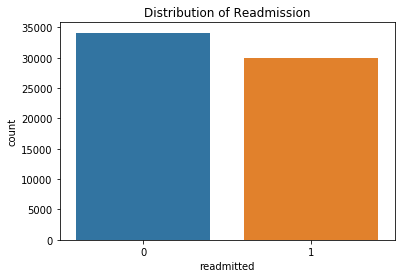

In [22]:
# Distribution of Readmission 
sns.countplot(hspt_data['readmitted']).set_title('Distribution of Readmission')

## Time in Hospital and Readmission

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

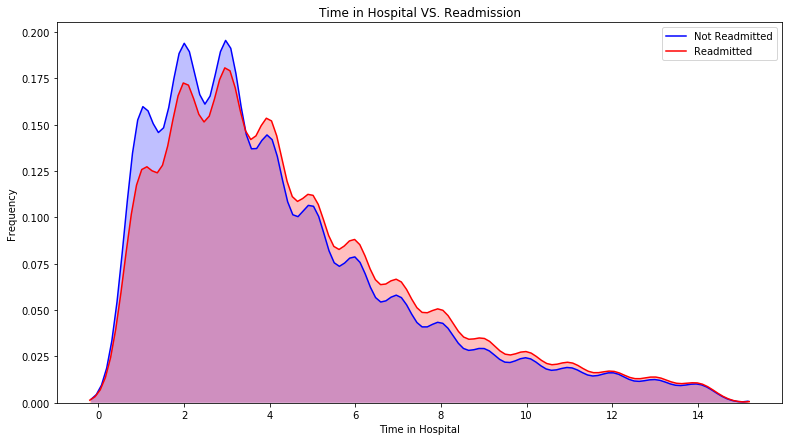

In [23]:
#Time in Hospital and Readmission
fig = plt.figure(figsize=(13,7),)
axis=sns.kdeplot(hspt_data.loc[(hspt_data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
axis=sns.kdeplot(hspt_data.loc[(hspt_data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
axis.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

## Age and Readmission

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

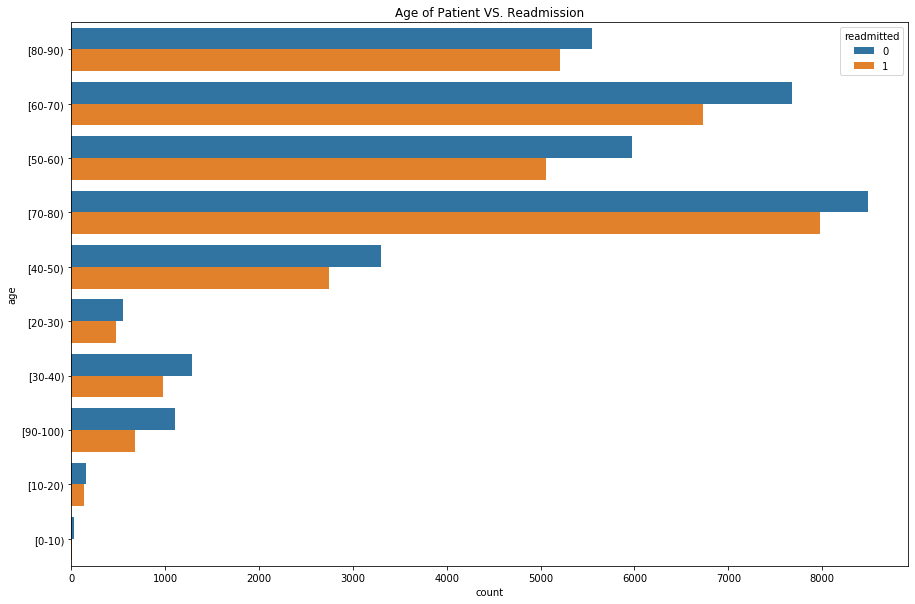

In [24]:
#Age and Readmission
fig = plt.figure(figsize=(15,10))
sns.countplot(y= hspt_data['age'], hue = hspt_data['readmitted']).set_title('Age of Patient VS. Readmission')

## Patient Race and Readmission

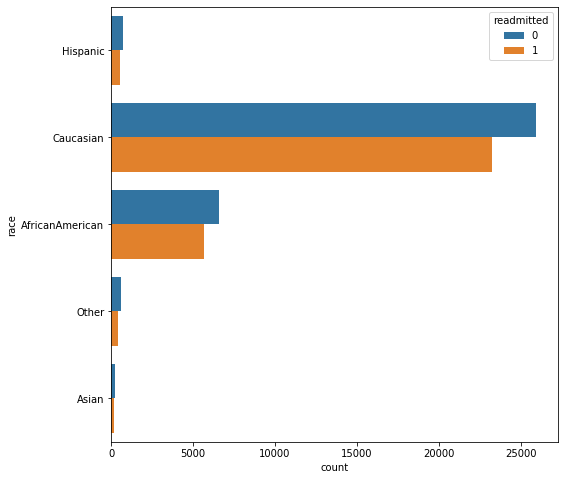

In [25]:
#Patient Race and Readmission
fig = plt.figure(figsize=(8,8))
sns.countplot(y = hspt_data['race'], hue = hspt_data['readmitted'])

## Number of medication used and Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

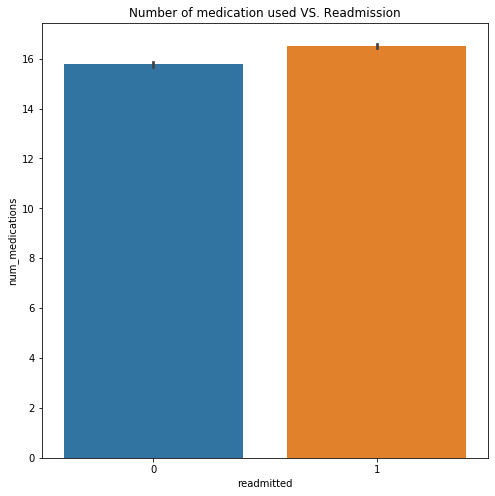

In [26]:
#Number of medication used and Readmission
fig = plt.figure(figsize=(8,8))
sns.barplot(x = hspt_data['readmitted'], y = hspt_data['num_medications']).set_title("Number of medication used VS. Readmission")

## Gender and Readmission

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

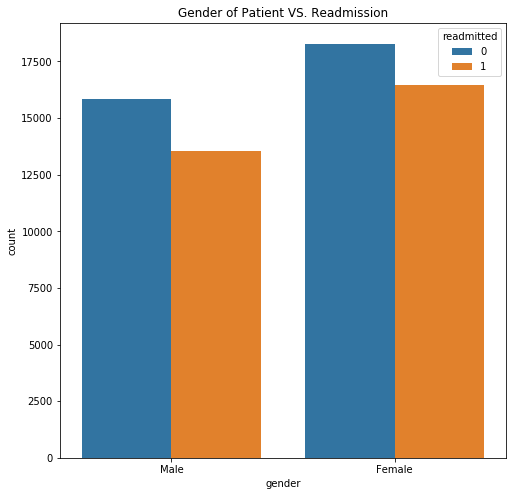

In [27]:
#Gender and Readmission
fig = plt.figure(figsize=(8,8))
sns.countplot(hspt_data['gender'], hue = hspt_data['readmitted']).set_title("Gender of Patient VS. Readmission")

## Change of Medication and Readmission¶

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

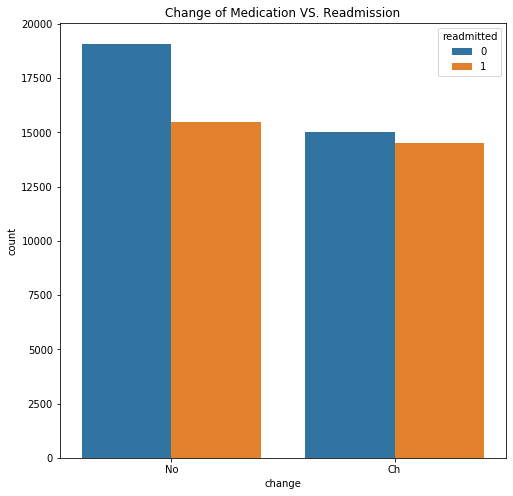

In [28]:
#Change of Medication and Readmission
fig = plt.figure(figsize=(8,8))
sns.countplot(hspt_data['change'], hue = hspt_data['readmitted']).set_title('Change of Medication VS. Readmission')

## Diabetes Medication prescribed and Readmission

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

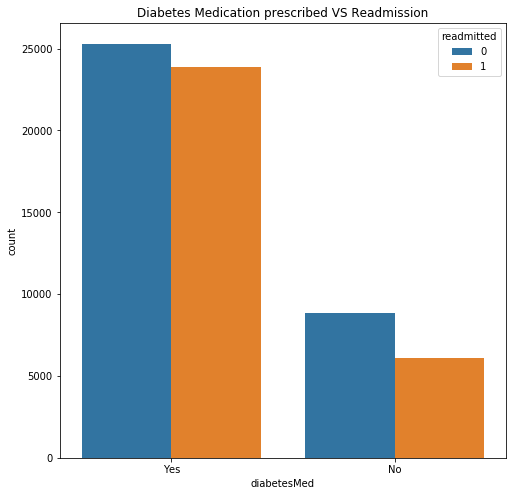

In [29]:
#Diabetes Medication prescribed and Readmission
fig = plt.figure(figsize=(8,8))
sns.countplot(hspt_data['diabetesMed'], hue = hspt_data['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

In [30]:
#we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.
hspt_data['change'] = hspt_data['change'].replace('Ch', 1)
hspt_data['change'] = hspt_data['change'].replace('No', 0)
hspt_data['gender'] = hspt_data['gender'].replace('Male', 1)
hspt_data['gender'] = hspt_data['gender'].replace('Female', 0)
hspt_data['diabetesMed'] = hspt_data['diabetesMed'].replace('Yes', 1)
hspt_data['diabetesMed'] = hspt_data['diabetesMed'].replace('No', 0)

In [31]:
test_data['change'] = test_data['change'].replace('Ch', 1)
test_data['change'] = test_data['change'].replace('No', 0)
test_data['gender'] = test_data['gender'].replace('Male', 1)
test_data['gender'] = test_data['gender'].replace('Female', 0)
test_data['diabetesMed'] = test_data['diabetesMed'].replace('Yes', 1)
test_data['diabetesMed'] = test_data['diabetesMed'].replace('No', 0)

In [32]:
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
hspt_data['age'] = hspt_data.age.map(age_dict)
hspt_data['age'] = hspt_data['age'].astype('int64')
hspt_data.age.value_counts()

75    16465
65    14406
55    11022
85    10761
45     6048
35     2271
95     1786
25     1037
15      292
5        40
Name: age, dtype: int64

In [33]:
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
test_data['age'] = test_data.age.map(age_dict)
test_data['age'] = test_data['age'].astype('int64')
test_data.age.value_counts()

75    4083
65    3605
55    2756
85    2681
45    1557
35     582
95     421
25     254
15      78
5       11
Name: age, dtype: int64

In [34]:
hspt_data.diag_5=hspt_data.diag_5.astype('category')

In [35]:
dummies = pd.get_dummies(hspt_data['race'])
hspt_data = pd.concat([hspt_data, dummies], axis=1)      
hspt_data.drop(['race'], inplace=True, axis=1)

In [36]:
hspt_data['X1'] = hspt_data['X1'].replace('>200', 1)
hspt_data['X1'] = hspt_data['X1'].replace('>300', 1)
hspt_data['X1'] = hspt_data['X1'].replace('Norm', 0)
hspt_data['X1'] = hspt_data['X1'].replace('None', -99)



In [37]:
hspt_data['X2'] = hspt_data['X2'].replace('>8', 1)
hspt_data['X2'] = hspt_data['X2'].replace('>7', 1)
hspt_data['X2'] = hspt_data['X2'].replace('Norm', 0)
hspt_data['X2'] = hspt_data['X2'].replace('None', -99)

In [38]:
test_data['X1'] = test_data['X1'].replace('>200', 1)
test_data['X1'] = test_data['X1'].replace('>300', 1)
test_data['X1'] = test_data['X1'].replace('Norm', 0)
test_data['X1'] = test_data['X1'].replace('None', -99)


test_data['X2'] = test_data['X2'].replace('>8', 1)
test_data['X2'] = test_data['X2'].replace('>7', 1)
test_data['X2'] = test_data['X2'].replace('Norm', 0)
test_data['X2'] = test_data['X2'].replace('None', -99)

In [39]:
cols=['gender','age', 'diag_1', 'diag_2', 'diag_3', 'diag_4','diag_5', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25']
hspt_data[cols]=hspt_data[cols].astype('category')

In [40]:
cols1=['gender','age', 'diag_1', 'diag_2', 'diag_3', 'diag_4','diag_5', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25']
test_data[cols1]=test_data[cols1].astype('category')

In [42]:
test_data.diag_5=test_data.diag_5.astype('category')

In [43]:
dummies = pd.get_dummies(test_data['race'])
test_data = pd.concat([test_data, dummies], axis=1)      
test_data.drop(['race'], inplace=True, axis=1)

In [55]:
cat_attr=list(hspt_data.select_dtypes("category").columns)
num_attr=list(hspt_data.columns.difference(cat_attr))

num_attr.pop(-2)

'readmitted'

In [56]:
numeric_transformer = Pipeline( steps = [('imputer', SimpleImputer(strategy='median')),
                                         ('scaler', StandardScaler())] )

categorical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy = 'most_frequent')),
                                           ('onehot', OneHotEncoder( handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer( transformers = [ ('num', numeric_transformer, num_attr),
                                                  ('cat', categorical_transformer, cat_attr)])

In [57]:
## Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Train-Test Split

In [58]:
X=hspt_data.drop('readmitted',axis=1)
y=hspt_data.readmitted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Logistic Regression Model-1

In [59]:
clf_logreg = Pipeline( steps = [('preprocessor', preprocessor),
                                ('classifier', LogisticRegression())])

In [60]:
%%time
clf_logreg.fit(X_train, y_train)

CPU times: user 12.3 s, sys: 2.26 s, total: 14.5 s
Wall time: 7.87 s


/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AfricanAmerican', 'Asian',
                                                   'Caucasian', 'Hispanic',
                                                   'Other', 'change',
                                                   'diabetesMed',
                                                   'encounter_id',
                                                   'num_lab_procedures',
                                                   'num_medications',
                                                   'num_procedur

In [61]:
# Evaluate Model

train_pred=clf_logreg.predict(X_train)
test_pred=clf_logreg.predict(X_test)

print(clf_logreg.score(X_train,y_train))
print(clf_logreg.score(X_test,y_test))



print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)
confusion_matrix_test

0.7876762681280491
0.6691096210821769
[[19846  4005]
 [ 5526 15512]]


array([[7499, 2778],
       [3588, 5374]])

In [62]:
#Get the accuracy,F1 score report
print(classification_report(y_true=y_test, y_pred =  test_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70     10277
           1       0.66      0.60      0.63      8962

    accuracy                           0.67     19239
   macro avg       0.67      0.66      0.67     19239
weighted avg       0.67      0.67      0.67     19239



## Decision Tree Model

In [63]:
#Build Decision Treee Model-2
clf=Pipeline(steps=[('preprocessor',preprocessor),
                          ('classifier',DecisionTreeClassifier())])

In [64]:
%%time
clf.fit(X_train, y_train)

CPU times: user 20.3 s, sys: 0 ns, total: 20.3 s
Wall time: 20.4 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AfricanAmerican', 'Asian',
                                                   'Caucasian', 'Hispanic',
                                                   'Other', 'change',
                                                   'diabetesMed',
                                                   'encounter_id',
                                                   'num_lab_procedures',
                                                   'num_medications',
                                                   'num_procedur

In [65]:
train_pred=clf.predict(X_train)
test_pred=clf.predict(X_test)

In [66]:
print(classification_report(y_true=y_test, y_pred =  test_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76     10277
           1       0.72      0.71      0.72      8962

    accuracy                           0.74     19239
   macro avg       0.74      0.74      0.74     19239
weighted avg       0.74      0.74      0.74     19239



In [68]:
print(classification_report(y_true=y_train, y_pred =  train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23851
           1       1.00      1.00      1.00     21038

    accuracy                           1.00     44889
   macro avg       1.00      1.00      1.00     44889
weighted avg       1.00      1.00      1.00     44889



## Descion Tree Model-2

In [67]:

clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])
                 #('name', GridSearchCV('classifier', param_grid=dt_param_grid, cv=5,verbose=3)))



dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 
                 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],
                 "classifier__min_samples_leaf": [1, 5, 10]}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5,verbose=3)

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   1.9s
[CV 2/5] END classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   1.9s
[CV 3/5] END classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   1.9s
[CV 4/5] END classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   1.9s
[CV 5/5] END classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   2.0s
[CV 1/5] END classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=10; total time=   1.9s
[CV 2/5] END classi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AfricanAmerican',
                                                                          'Asian',
                                                                          'Caucasian',
                                                                          'Hispanic',
                                                           

In [69]:
dt_grid.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 12,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2}

In [70]:
train_pred = dt_grid.predict(X_train)
test_pred = dt_grid.predict(X_test)

print(dt_grid.score(X_train, y_train))
print(dt_grid.score(X_test, y_test))

0.7195972287197309
0.6503976298144394


In [71]:
print(classification_report(y_true=y_test, y_pred =  test_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68     10277
           1       0.63      0.61      0.62      8962

    accuracy                           0.65     19239
   macro avg       0.65      0.65      0.65     19239
weighted avg       0.65      0.65      0.65     19239



In [72]:
print(classification_report(y_true=y_train, y_pred =  train_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74     23851
           1       0.70      0.69      0.70     21038

    accuracy                           0.72     44889
   macro avg       0.72      0.72      0.72     44889
weighted avg       0.72      0.72      0.72     44889



## Random Forest Model

In [73]:
#Build Random Forest Model-3 
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [74]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"classifier__n_estimators" : [150, 250, 300],
              "classifier__max_depth" : [5,8,10],
              "classifier__max_features" : [3, 5, 7],
              "classifier__min_samples_leaf" : [4, 6, 8, 10]}

rf_grid = GridSearchCV(clf, param_grid= param_grid, cv=kfold,verbose=1,n_jobs=6)

In [75]:
%%time
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 11.6 s, sys: 307 ms, total: 11.9 s
Wall time: 14min 54s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AfricanAmerican',
                                                                          'Asian',
                                                                          'Caucasian',
                                                                          'Hispanic',
 

In [76]:
rf_grid.best_params_

{'classifier__max_depth': 5,
 'classifier__max_features': 3,
 'classifier__min_samples_leaf': 4,
 'classifier__n_estimators': 150}

In [77]:
train_pred = rf_grid.predict(X_train)
test_pred = rf_grid.predict(X_test)

print(rf_grid.score(X_train, y_train))
print(rf_grid.score(X_test, y_test))

print(classification_report(y_true=y_test, y_pred =  test_pred))
print(classification_report(y_true=y_train, y_pred =  train_pred))

0.5313328432355365
0.5341753729403815
              precision    recall  f1-score   support

           0       0.53      1.00      0.70     10277
           1       0.00      0.00      0.00      8962

    accuracy                           0.53     19239
   macro avg       0.27      0.50      0.35     19239
weighted avg       0.29      0.53      0.37     19239

              precision    recall  f1-score   support

           0       0.53      1.00      0.69     23851
           1       0.00      0.00      0.00     21038

    accuracy                           0.53     44889
   macro avg       0.27      0.50      0.35     44889
weighted avg       0.28      0.53      0.37     44889



/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/share/anaconda3/lib/python3.7/si

## Gradient Boosting Model

In [78]:
#Build Gradient Boosting

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('GBM',GradientBoostingClassifier())])

In [ ]:
%%time
gbm_param_grid = {'GBM__max_depth': [8,10,12,14], 'GBM__subsample': [0.8, 0.6,], 'GBM__max_features':[0.2, 0.3], 
              'GBM__n_estimators': [10, 20, 30]}

gbm_grid = GridSearchCV(clf, param_grid=gbm_param_grid, cv=3,n_jobs=6)

gbm_grid.fit(X_train,y_train)

In [ ]:
gbm_grid.best_params_

In [ ]:
train_pred = gbm_grid.predict(X_train)
test_pred = gbm_grid.predict(X_test)

print(gbm_grid.score(X_train, y_train))
print(gbm_grid.score(X_test, y_test))


print(classification_report(y_true=y_test, y_pred =  test_pred))
print(classification_report(y_true=y_train, y_pred =  train_pred))

## SVM Model

In [ ]:
#Build SVM

%%time
clf_svm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])

svm_param_grid = {'classifier__C': [50,90], 'classifier__gamma': [0.008, 0.001],
                 "classifier__kernel": ['rbf']}

svm_grid = GridSearchCV(clf_svm, param_grid= svm_param_grid, cv= 5,n_jobs=6)

svm_grid.fit(X_train,y_train)

In [ ]:
svm_grid.best_params_

In [ ]:
train_pred = svm_grid.predict(X_train)
test_pred = svm_grid.predict(X_test)

print(svm_grid.score(X_train, y_train))
print(svm_grid.score(X_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)

In [ ]:

print(classification_report(y_true=y_test, y_pred =  test_pred))
print(classification_report(y_true=y_train, y_pred =  train_pred))